First 5 rows of the dataset:


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB

Statistical Summary:


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


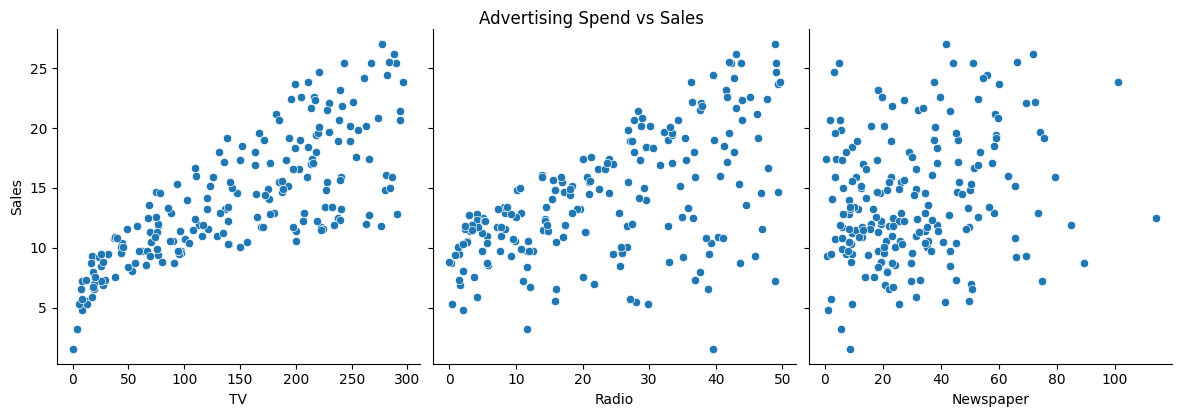

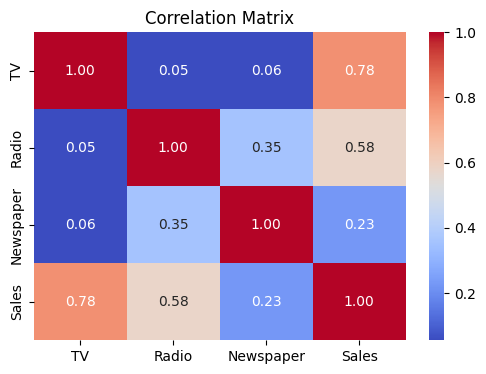


Model Performance:
Mean Absolute Error (MAE): 1.46
Root Mean Squared Error (RMSE): 1.78
R² Score: 0.90


,Actual Sales,Predicted Sales
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373


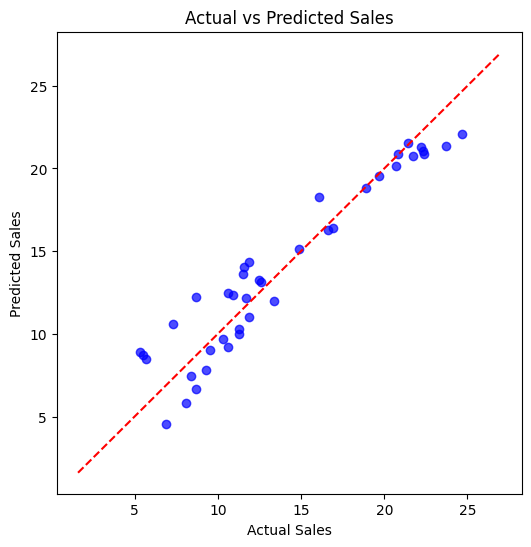


Predicted Sales for New Data:
[17.71126703 11.23975753]


In [1]:
# Sales Prediction using Advertising Dataset

# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load dataset
df = pd.read_csv("Advertising.csv")

# 3. Explore the dataset
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
display(df.describe())

# 4. Drop unnecessary index column
df = df.drop(columns=["Unnamed: 0"])

# 5. Visualize relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle("Advertising Spend vs Sales", y=1.02)
plt.show()

# Heatmap for correlations
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 6. Define features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 9. Predictions
y_pred = model.predict(X_test)

# 10. Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 11. Compare actual vs predicted
comparison_df = pd.DataFrame({"Actual Sales": y_test, "Predicted Sales": y_pred})
display(comparison_df.head())

# 12. Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# 13. Predict for new data
new_data = pd.DataFrame({
    'TV': [200, 120],
    'Radio': [30, 15],
    'Newspaper': [40, 20]
})

predictions = model.predict(new_data)
print("\nPredicted Sales for New Data:")
print(predictions)
